# WUM
## Praca domowa nr 2
## Autor: Mariusz Słapek

# Część 0
# Biblioteki oraz załadowanie danych

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [96]:
data.head(3)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

# Część 1

# Kodowanie zmiennych kategorycznych

#### Unikalne wartości

In [98]:
len(data['it_location'].unique())

10056

In [99]:
len(data['it_location'].str.lower().unique())

7903

#### Dlaczego *target encoding* ma przewagę nad *OneHotEncoding*?

Dla *OneHotEncodingu* zostałoby stworzone ponad dziesięć tysięcy nowy kolumn. W przypadku *Target Encodingu* jest tworzona tylko jedna dodatkowa kolumna. Na pewno jest to znaczące gdy mamy aż tak dużo unikalnych wartości

## Biblioteki

In [100]:
from category_encoders import TargetEncoder

## *Target encoding* zmiennej *it_location*

In [88]:
data['it_location'] = data['it_location'].str.lower()
data['it_location_en'] = TargetEncoder().fit_transform(data.it_location, data.price)

In [90]:
data[['item_id', 'it_location', 'it_location_en', 'price']].sample(4)

,item_id,it_location,it_location_en,price
384496,6012138524,leszno,64.883187,6.99
346915,6089199131,bydgoszcz,68.023919,6.89
218128,6059302033,białystok,73.772916,124.99
74196,5751070692,gliwice,126.934165,58.99


## Enkodowanie dla *main_category*

### Biblioteki

In [126]:
from category_encoders import BinaryEncoder
from category_encoders import BaseNEncoder
from sklearn.preprocessing import OneHotEncoder 

### Zapoznanie z *main_category*

In [103]:
data['main_category'].unique()

array(['Komputery', 'Odzież, Obuwie, Dodatki', 'Dom i Ogród',
       'Książki i Komiksy', 'Biżuteria i Zegarki', 'RTV i AGD',
       'Motoryzacja', 'Dla Dzieci', 'Uroda', 'Telefony i Akcesoria',
       'Sport i Turystyka', 'Delikatesy', 'Kolekcje', 'Gry', 'Rękodzieło',
       'Zdrowie', 'Przemysł', 'Filmy', 'Fotografia', 'Biuro i Reklama',
       'Instrumenty', 'Muzyka', 'Konsole i automaty',
       'Sprzęt estradowy, studyjny i DJ-ski', 'Antyki i Sztuka', 'Bilety',
       'Nieruchomości'], dtype=object)

In [105]:
len(data['main_category'].unique()) # lub .nunique() -> number of unique

27

### One-hot encoding

##### 1. sposób

In [113]:
data_out = pd.get_dummies(data, prefix=['main_cat'], columns=['main_category'])
data_out.sample(2)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_cat_Nieruchomości,"main_cat_Odzież, Obuwie, Dodatki",main_cat_Przemysł,main_cat_RTV i AGD,main_cat_Rękodzieło,main_cat_Sport i Turystyka,"main_cat_Sprzęt estradowy, studyjny i DJ-ski",main_cat_Telefony i Akcesoria,main_cat_Uroda,main_cat_Zdrowie
303865,303865,2016-04-03 17:01:54,4949144255,"['Dla Dzieci', 'Odzież', 'Bielizna', 'Body', '...",1,1,sylwina5555,9.9,1,9547,...,0,0,0,0,0,0,0,0,0,0
397762,397762,2016-04-03 17:25:57,4867276629,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Hy...",1,1,energoszczednosc,19.0,1,983,...,0,0,0,0,0,0,0,0,0,0


##### 2. sposób

In [123]:
data_oe = data.copy()
oe = OneHotEncoder(sparse=False)

data_out =  oe.fit_transform(data_oe[['main_category']])
data_out = pd.DataFrame(data=data_out)
data_out.columns = oe.get_feature_names(['main_category'])

data_out=pd.concat([data_out, data_oe], axis=1)

data_out.sample(2)

,main_category_Antyki i Sztuka,main_category_Bilety,main_category_Biuro i Reklama,main_category_Biżuteria i Zegarki,main_category_Delikatesy,main_category_Dla Dzieci,main_category_Dom i Ogród,main_category_Filmy,main_category_Fotografia,main_category_Gry,...,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
399371,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,JACEK63,7.0,0,3,0,2356,Mysłakowice,Biuro i Reklama
291793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,flavour-design,39.0,1,282,0,15923,WARSZAWA,Telefony i Akcesoria


### Binary encoder

#### Wyjaśnienie 

Kolejne wartości binarne (0001 - 1, 0010 - 2, 0011 - 3 itd.). Do i-tej pozycji liczby binarnej jest tworzona kolumna (tyle kolumn ile potrzeba liczb do zapisu liczby kategorii). Ogranicza to liczbę kolumn (jest ich po prostu mniej). 

In [131]:
data_out = BinaryEncoder().fit_transform(data['main_category'], data['price'])
data_out.head()

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0


#### Ważne

Należy tu dodać te ramki do Dataframe - concatenate (join z indeksami) - anlogicznie jak w przypadku *OneHotEncoding*.

#### Komentarz

Liczba kolumn rośnie, ale nie tak wyraźnie jak w *OneHotEncoder*. Zmienne zostały poprawnie zakodowane (jak opisane w Wyjaśnieniu).

### BaseN

#### Wyjaśnienie 

Dla:
1. n = 1 to OneHotEncoding
2. n = 2 to BinaryEncoding
3. n > 2 to już enkodowanie o podstawie N

Po prostu zmienne z enkodowane w danym sposobie zapisu liczby (znane są systemy dziesiątkowe, ósemkowe itd.)

In [130]:
data_baseN = data.copy()
data_out = BaseNEncoder(base=8).fit_transform(data_baseN['main_category'])

data_out.head(10)

,main_category_0,main_category_1,main_category_2
0,0,0,1
1,0,0,2
2,0,0,3
3,0,0,4
4,0,0,2
5,0,0,2
6,0,0,2
7,0,0,5
8,0,0,6
9,0,0,6


#### Ważne

Należy tu dodać te ramki do Dataframe - concatenate (join z indeksami) - anlogicznie jak w przypadku *OneHotEncoding*.

#### Komentarz

Liczba kolumn rośnie, ale nie tak wyraźnie jak w *OneHotEncoder* (jest to zależne od N). Zmienne zostały poprawnie zakodowane (jak opisane w Wyjaśnieniu).

# Cześć 2

# Imputacja danych

## Losowe usunięcie (dodanie *np.NaN*) 10% wartości ze zmiennej *it_seller_rating*

In [70]:
from pandas import DataFrame
from typing import List 

In [5]:
imputed_data = data[['it_seller_rating', 'it_quantity', 'price']]
imputed_data.head(3)
imputed_data.isnull().mean() 

it_seller_rating    0.0
it_quantity         0.0
price               0.0
dtype: float64

In [69]:
def make_NaN(data:DataFrame, ratio: float, cols: List) -> DataFrame:
    imputed_data = data[['it_seller_rating', 'it_quantity', 'price']]
    nan_idx = imputed_data.sample(frac=ratio).index
    for i in cols:
        imputed_data[i].iloc[nan_idx] = np.NaN
    
    return imputed_data

In [7]:
make_NaN(data=data, ratio=0.1).isnull().mean() 

it_seller_rating    0.1
it_quantity         0.0
price               0.0
dtype: float64

## Nearest neighbors imputation

In [8]:
from sklearn.impute import KNNImputer

### Zbyt wolne - za dużo jest danych

Z tego powodu skorzystałem z drugiego sposoby (opis niżej)

## Multivariate feature imputation

#### Biblioteki

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
import statistics

### Brak danych w kolumnie *it_seller_rating*

#### Obliczenie błędów

In [64]:
rmse_error_list_1 = []
for i in range(10):
    # zrobienie z danych 10% NaN
    data_in = make_NaN(data=data, ratio=0.1, cols=['it_seller_rating'])
    # imputacja
    imp = IterativeImputer(max_iter=20)
    data_out = imp.fit_transform(data_in[['it_seller_rating', 'it_quantity', 'price']])

    df = pd.DataFrame(data=data_out, columns=['it_seller_rating', 'it_quantity', 'price'])
    rmse_error_list_1.append(mean_squared_error(data[['it_seller_rating', 'it_quantity', 'price']], df, squared=False))

print(rmse_error_list_1)
print('==========')
print(data_in.isnull().mean())
print(df.isnull().mean())

[6750.97610612867, 6701.155132692241, 6618.95197209958, 6744.574768269065, 6692.635487761598, 6672.120991662897, 6517.342007592855, 6803.382783852032, 6705.82460870055, 6598.32928932476]
it_seller_rating    0.1
it_quantity         0.0
price               0.0
dtype: float64
it_seller_rating    0.0
it_quantity         0.0
price               0.0
dtype: float64


#### Odchylenie standardowe

In [65]:
std_dev = statistics.stdev(rmse_error_list_1)
print(std_dev)

83.41249007950333


### Brak danych w kolumnach *it_seller rating* oraz *it_quantity*

#### Obliczenie błędów

In [66]:
rmse_error_list_2 = []
for i in range(10):
    # zrobienie z danych 10% NaN
    data_in = make_NaN(data=data, ratio=0.1, cols=['it_seller_rating', 'it_quantity'])
    # imputacja
    imp = IterativeImputer(max_iter=20)
    data_out = imp.fit_transform(data_in[['it_seller_rating', 'it_quantity', 'price']])

    df = pd.DataFrame(data=data_out, columns=['it_seller_rating', 'it_quantity', 'price'])
    rmse_error_list_2.append(mean_squared_error(data[['it_seller_rating', 'it_quantity', 'price']], df, squared=False))

print(rmse_error_list_2)
print('==========')
print(data_in.isnull().mean())
print(df.isnull().mean()) 

[8067.370311611619, 7979.33858022185, 7958.665518293836, 7967.399978201129, 7996.135275958299, 7843.203865201612, 7963.354430856491, 7967.868019209252, 7812.8074663843945, 7930.904557197998]
it_seller_rating    0.1
it_quantity         0.1
price               0.0
dtype: float64
it_seller_rating    0.0
it_quantity         0.0
price               0.0
dtype: float64


#### Odchylenie standardowe

In [67]:
std_dev = statistics.stdev(rmse_error_list_2)
print(std_dev)

73.1934496226179


### Wykres

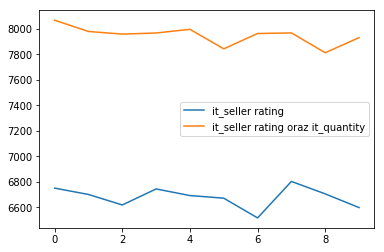

In [68]:
data_to_plot = pd.DataFrame({"it_seller rating": rmse_error_list_1, "it_seller rating oraz it_quantity": rmse_error_list_2})

data_to_plot.plot()

#### Wnioski

Błąd jest większy, gdy imputujemy do dwóch kolumn co wydaje się dość oczywiste (większe rozbieżności od normy). Odchylenie standardowe dla dwóch przypadków jest bardzo zbliżone. 